<a href="https://colab.research.google.com/github/kalyankargouri/machine-learning/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np

csv_path= '/content/drive/MyDrive/MachineLearning/MAGIC_Gamma_Telescope.csv'
df=pd.read_csv(csv_path)

# Encode the 'class' column
df['class'] = df['class'].map({'g': 0, 'h': 1})

In [3]:
X=df[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']].values
Y=df['class'].values

In [4]:
from sklearn.model_selection import train_test_split

X=df[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']].values
Y=df['class'].values

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
Y_train = Y_train.astype(np.float64)
Y_test = Y_test.astype(np.float64)
print(X.shape,X_train.shape,X_test.shape)

(19020, 10) (15216, 10) (3804, 10)


In [5]:
w=np.zeros(X_train.shape[1])
b=0

learning_rate=0.01
epochs=1000

def compute_z(w,b,X):
  z=np.dot(w,X.T)+b
  return z

def sigmoid(z):
  return 1/(1+np.exp(-z))

def compute_cost(Y_true,Y_pred):
  m=len(Y_true)
  # Add a small epsilon to prevent log(0)
  epsilon = 1e-15
  cost = - (1/m) * np.sum(Y_true*np.log(Y_pred + epsilon) + (1 - Y_true)*np.log(1 - Y_pred + epsilon))
  return cost

def compute_gradient(X,Y_true,Y_pred):
  m=len(Y_true)
  dw = (1/m)*np.dot(X.T,(Y_pred-Y_true))
  db=(1/m)*np.sum(Y_pred-Y_true)
  return dw,db

In [6]:
import numpy as np

for epoch in range(epochs):
  z=compute_z(w,b,X_train)
  Y_pred=sigmoid(z)
  cost=compute_cost(Y_train,Y_pred)
  dw,db=compute_gradient(X_train,Y_train,Y_pred)

  w=w-learning_rate*dw
  b=b-learning_rate*db

  if epoch%100==0:
    print(f'Epoch:{epoch},Cost:{cost}')

z_test = compute_z(w, b, X_test)
Y_pred_test = sigmoid(z_test)


test_cost = compute_cost(Y_test, Y_pred_test)
print(f"Test Cost: {test_cost}")

Epoch:0,Cost:0.6931471805599435
Epoch:100,Cost:11.355174724045044
Epoch:200,Cost:11.579425498690874
Epoch:300,Cost:10.69266267153718
Epoch:400,Cost:10.91472690305468
Epoch:500,Cost:6.094601720100262
Epoch:600,Cost:10.932372538710961
Epoch:700,Cost:10.6856092816253
Epoch:800,Cost:6.360354377691029
Epoch:900,Cost:6.120674596108191
Test Cost: 10.822779879692632


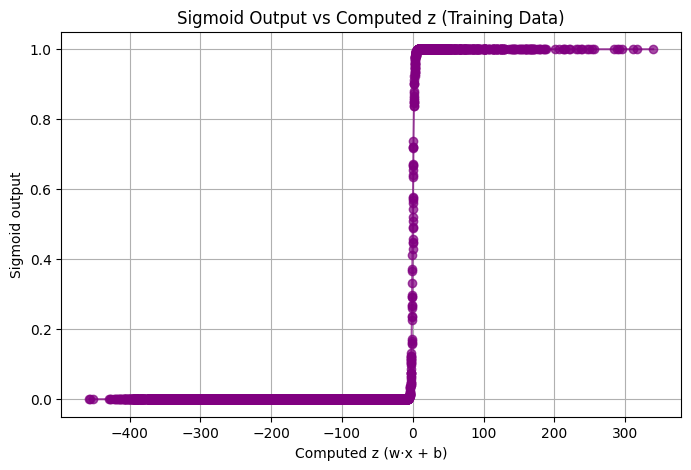

In [7]:
import matplotlib.pyplot as plt

z_train = compute_z(w, b, X_train)

sigmoid_train = sigmoid(z_train)

sorted_indices = np.argsort(z_train)
z_sorted = z_train[sorted_indices]
sigmoid_sorted = sigmoid_train[sorted_indices]

plt.figure(figsize=(8,5))
plt.plot(z_sorted, sigmoid_sorted, marker='o', linestyle='-', color='purple', alpha=0.7)
plt.xlabel('Computed z (w·x + b)')
plt.ylabel('Sigmoid output')
plt.title('Sigmoid Output vs Computed z (Training Data)')
plt.grid(True)
plt.show()